# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Regression
### VIDEO: Polynomial regression
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt

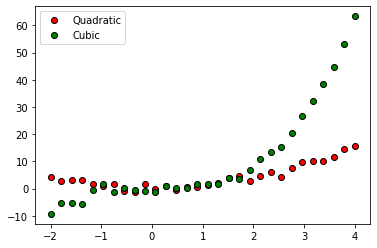

In [2]:
## generate the data

n = 30
x = np.linspace(-2, 4, n)
y1 = x**2 + np.random.randn(n)
y2 = x**3 + np.random.randn(n)

# plot the data
plt.plot(x, y1, 'ko', markerfacecolor='r')
plt.plot(x, y2, 'ko', markerfacecolor='g')
plt.legend(('Quadratic', 'Cubic'))
plt.show()

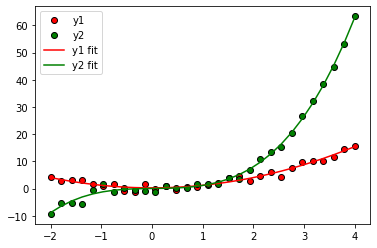

In [3]:
## now for a polynomial fit

# for y1
pterms = np.polyfit(x, y1, 2)  # highest power terms first!
yHat1 = np.polyval(pterms, x)

# for y2
pterms = np.polyfit(x, y2, 3)
yHat2 = np.polyval(pterms, x)

# and all the plotting
plt.plot(x, y1, 'ko', markerfacecolor='r', label='y1')
plt.plot(x, y2, 'ko', markerfacecolor='g', label='y2')
plt.plot(x, yHat1, 'r', label='y1 fit')
plt.plot(x, yHat2, 'g', label='y2 fit')
plt.legend()
plt.show()

In [4]:
# compute R2

# compute R2 for several polynomial orders
orders = np.arange(1, 6)

# output matrices
r2 = np.zeros((2, len(orders)))
sse = np.zeros((2, len(orders)))

# the loop!
for oi in range(len(orders)):
    
    # y1
    # fit the model with oi terms
    pterms = np.polyfit(x, y1, orders[oi])
    yHat = np.polyval(pterms, x)
    # compute R2
    ss_eta = np.sum((y1 - yHat)**2)  # numerator, total residual between observed and model values
    ss_tot = np.sum((y1 - np.mean(y1))**2)  # denominator
    r2[0, oi] = 1 - ss_eta / ss_tot  # R^2
    sse[0, oi] = ss_eta  # store just the SSe for model comparison later
    
    
    #y2
    # fit the model with oi terms
    pterms = np.polyfit(x, y2, orders[oi])
    yHat = np.polyval(pterms, x)
    # compute R2
    ss_eta = np.sum((y2-yHat)**2)
    ss_tot = np.sum((y2 - np.mean(y2))**2)
    #ss_tot = np.var(y2)*(n-1) gives the same result as the line above
    r2[1, oi] = 1 - ss_eta / ss_tot
    sse[1, oi] = ss_eta

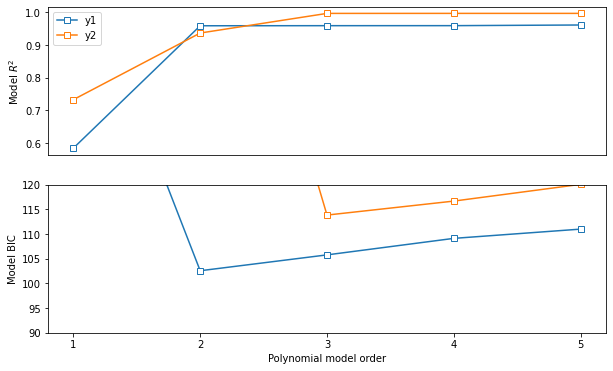

In [5]:
fig,ax = plt.subplots(2, 1,figsize=(10, 6))

# plot the R2 results
ax[0].plot(orders, r2[0,:], 's-', markerfacecolor='w')
ax[0].plot(orders, r2[1,:], 's-', markerfacecolor='w')
ax[0].set_ylabel('Model $R^2$')
ax[0].set_xticks([])
ax[0].legend(('y1', 'y2'))

# compute the Bayes Information Criterion
bic = n*np.log(sse) + orders*np.log(n)
ax[1].plot(orders, bic[0, :], 's-', markerfacecolor='w')
ax[1].plot(orders, bic[1, :], 's-', markerfacecolor='w')
ax[1].set_xlabel('Polynomial model order')
ax[1].set_xticks(range(1, 6))
ax[1].set_ylabel('Model BIC')
# optional zoom
ax[1].set_ylim([90,120])

plt.show()